In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark

spark-3.0.0-bin-hadoop2.7/
spark-3.0.0-bin-hadoop2.7/NOTICE
spark-3.0.0-bin-hadoop2.7/kubernetes/
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.0-bin-hadoop2.7/jars/
spark-3.0.0-bin-hadoop2.7/jars/jacks

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [ ]:
spark= SparkSession\
        .builder\
        .appName("ReadandWrite")\
        .getOrCreate()

In [ ]:
spark.sparkContext.getConf().getAll()

[('spark.driver.port', '35873'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.app.id', 'local-1596630504001'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'ReadandWrite'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.host', '1972d410bedf'),
 ('spark.ui.showConsoleProgress', 'true')]

In [ ]:
spark

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "/content/Case_Information.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


In [ ]:
df.count()

case_id                      12091
age                          12070
age_group                    12070
sex                          12091
date_announced               12091
date_recovered                1237
date_of_death                  657
status                       12091
date_announced_as_removed     3266
province                     11053
muni_city                    11053
health_status                12091
home_quarantined              5310
date_of_onset_of_symptoms     6561
pregnant                      1925
region                       11053
dtype: int64

What do we want to find from this dataset?
1. Philippine has recorded Southeast Asia's biggest daily jump in coronavirus deaths in the month of June. Why?
2. Which age group is the most affected with Covid-19?
3. Which age group has the highest risk of death when affected with covid-19?
4. Covid-19 in the Philippine has reduced in April but increased again in May. Which province in the Philippine has led to the increased number of cases in the Philippine?


Check Data type for all columns

In [ ]:
df.dtypes

case_id                       object
age                          float64
age_group                     object
sex                           object
date_announced                object
date_recovered                object
date_of_death                 object
status                        object
date_announced_as_removed     object
province                      object
muni_city                     object
health_status                 object
home_quarantined              object
date_of_onset_of_symptoms     object
pregnant                      object
region                        object
dtype: object

Change data type to the correct data type

In [ ]:
df['date_announced']= pd.to_datetime(df['date_announced'])
df['date_recovered']= pd.to_datetime(df['date_recovered'])
df['date_of_death']= pd.to_datetime(df['date_of_death'])
df['date_announced_as_removed']= pd.to_datetime(df['date_announced_as_removed'])
df['date_of_onset_of_symptoms']= pd.to_datetime(df['date_of_onset_of_symptoms'])
df['case_id'] = df['case_id'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['sex'] = df['sex'].astype('category')
df['status'] = df['status'].astype('category')
df['province'] = df['province'].astype('category')
df['muni_city'] = df['muni_city'].astype('category')
df['health_status'] = df['health_status'].astype('category')
df['home_quarantined'] = df['home_quarantined'].astype('category')
df['pregnant'] = df['pregnant'].astype('category')
df['region'] = df['region'].astype('category')
df.dtypes

case_id                            category
age                                 float64
age_group                          category
sex                                category
date_announced               datetime64[ns]
date_recovered               datetime64[ns]
date_of_death                datetime64[ns]
status                             category
date_announced_as_removed    datetime64[ns]
province                           category
muni_city                          category
health_status                      category
home_quarantined                   category
date_of_onset_of_symptoms    datetime64[ns]
pregnant                           category
region                             category
dtype: object

Check the list of all columns in the dataset

In [ ]:
print(df.keys())

Index(['case_id', 'age', 'age_group', 'sex', 'date_announced',
       'date_recovered', 'date_of_death', 'status',
       'date_announced_as_removed', 'province', 'muni_city', 'health_status',
       'home_quarantined', 'date_of_onset_of_symptoms', 'pregnant', 'region'],
      dtype='object')


Drop the column that has the same data

In [ ]:
df.drop('health_status', inplace=True, axis=1)

Check the list of all columns in the dataset after drop the health_status column

In [ ]:
print(df.keys())

Index(['case_id', 'age', 'age_group', 'sex', 'date_announced',
       'date_recovered', 'date_of_death', 'status',
       'date_announced_as_removed', 'province', 'muni_city',
       'home_quarantined', 'date_of_onset_of_symptoms', 'pregnant', 'region'],
      dtype='object')


In [ ]:
df.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaT,NaT,Recovered,2020-02-07,Negros Oriental,Dumaguete City,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaT,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaT,Recovered,2020-02-05,Bohol,Panglao,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaT,NaT,Recovered,2020-03-27,Metropolitan Manila,Taguig,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaT,2020-03-11,Died,2020-03-12,Rizal,Cainta,No,2020-02-25,NaN,CALABARZON (Region IV-A)


Philippine has recorded Southeast Asia's biggest daily jump in coronavirus deaths in the month of June. Why?

Select two columns : date_announced and home_quarantined to do the analysis

In [ ]:
data1 = df[['date_announced', 'home_quarantined']]

In [ ]:
data1

,date_announced,home_quarantined
0,2020-01-30,NaN
1,2020-02-03,NaN
2,2020-02-05,No
3,2020-03-06,No
4,2020-03-06,No
...,...,...
12086,2020-05-15,NaN
12087,2020-05-15,NaN
12088,2020-05-15,NaN
12089,2020-05-15,Yes


Drop rows that have NAN values


In [ ]:
data1= data1.dropna()
data1= data1.reset_index(drop=True)
data1

,date_announced,home_quarantined
0,2020-02-05,No
1,2020-03-06,No
2,2020-03-06,No
3,2020-03-07,No
4,2020-03-08,No
...,...,...
5305,2020-05-15,Yes
5306,2020-05-15,Yes
5307,2020-05-15,Yes
5308,2020-05-15,Yes


To separate and count Yes and No data from home_quarantined column
 

In [ ]:
data1[data1.home_quarantined == 'Yes'].describe()

,date_announced,home_quarantined
count,3400,3400
unique,69,1
top,2020-03-31 00:00:00,Yes
freq,225,3400
first,2020-03-08 00:00:00,NaN
last,2020-05-15 00:00:00,NaN


Count 'Yes' data from home_quarantined column

In [ ]:
quarantined_yes = data1[data1.home_quarantined == 'Yes'].count()
quarantined_yes

date_announced      3400
home_quarantined    3400
dtype: int64

Count 'No' data from home_quarantined column

In [ ]:
data1[data1.home_quarantined == 'No'].describe()

,date_announced,home_quarantined
count,1910,1910
unique,67,1
top,2020-03-31 00:00:00,No
freq,218,1910
first,2020-02-05 00:00:00,NaN
last,2020-05-13 00:00:00,NaN


In [ ]:
quarantined_no = data1[data1.home_quarantined == 'No'].count()
quarantined_no

date_announced      1910
home_quarantined    1910
dtype: int64

Using formula to calculate the percentage of Yes and No for people quarantine at home

In [ ]:
total = quarantined_yes + quarantined_no
yes_percentage = round((quarantined_yes / total)*100)
yes_percentage 
 

date_announced      64.0
home_quarantined    64.0
dtype: float64

In [ ]:
no_percentage = 100 - yes_percentage
no_percentage

date_announced      36.0
home_quarantined    36.0
dtype: float64

Using pie chart to calculate the percentage of Yes and No for people quarantine at home

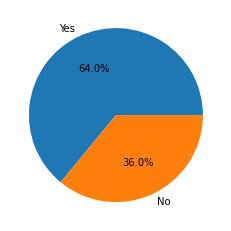

In [ ]:
quarantined_no, quarantined_yes = 3400, 1910
fig, ax = plt.subplots()
ax.pie((quarantined_no, quarantined_yes), labels=('Yes', 'No'), autopct='%1.1f%%')
plt.show()

Extract month from date_announced column

In [ ]:
data1['month'] = pd.DatetimeIndex(data1['date_announced']).month
data1

,date_announced,home_quarantined,month
0,2020-02-05,No,2
1,2020-03-06,No,3
2,2020-03-06,No,3
3,2020-03-07,No,3
4,2020-03-08,No,3
...,...,...,...
5305,2020-05-15,Yes,5
5306,2020-05-15,Yes,5
5307,2020-05-15,Yes,5
5308,2020-05-15,Yes,5


In [ ]:
data1.dtypes

date_announced      datetime64[ns]
home_quarantined          category
month                        int64
dtype: object

Group the data by month acolumn and home_quarantined column

In [ ]:
data1_test = data1.groupby(["month", "home_quarantined"])["date_announced"].size()
data1_test

month  home_quarantined
2      No                     1
       Yes                    0
3      No                   865
       Yes                  946
4      No                  1003
       Yes                 2098
5      No                    41
       Yes                  356
Name: date_announced, dtype: int64

Unstack the data from home_quarantined column to separate 'Yes' and 'No' into two differents new column

In [ ]:
data1_test1 = data1_test.unstack()
data1_test1

home_quarantined,No,Yes
month,,
2,1,0
3,865,946
4,1003,2098
5,41,356


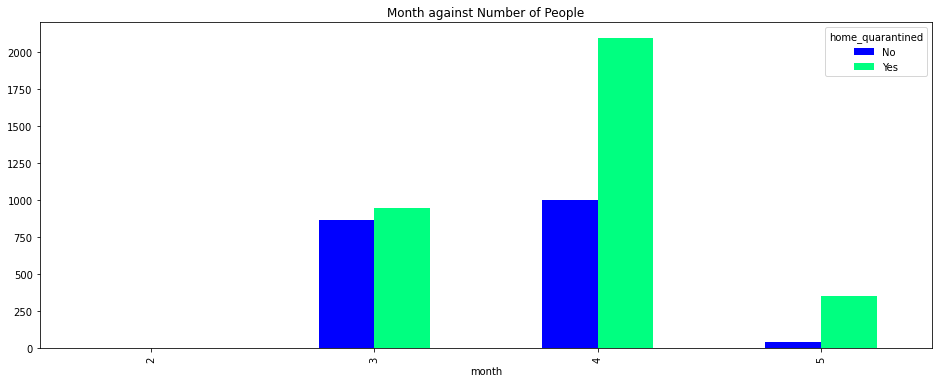

In [ ]:
data1_test1.plot(kind='bar', title="Month against Number of People", figsize=[16,6], colormap='winter')

## Which age group is the most affected with Covid-19?

In [ ]:
df['age_group'].describe()

count        12070
unique          17
top       30 to 34
freq          1510
Name: age_group, dtype: object

In [ ]:
data2 = df[['age','age_group']]
data2

,age,age_group
0,38.0,35 to 39
1,44.0,40 to 44
2,60.0,60 to 64
3,48.0,45 to 49
4,62.0,60 to 64
...,...,...
12086,35.0,35 to 39
12087,37.0,35 to 39
12088,62.0,60 to 64
12089,18.0,15 to 19


In [ ]:
data2_count = data2.groupby(["age_group"])["age"].value_counts()
data2_count

age_group  age  
0 to 4     0.0      57
           1.0      31
           2.0      24
           3.0      21
           4.0      21
                    ..
80+        96.0      3
           99.0      3
           95.0      2
           97.0      1
           101.0     1
Name: age, Length: 100, dtype: int64

Group by age group to find the total case for each age group

In [ ]:
data2.groupby(["age_group"])["age"].count()

age_group
0 to 4       154
10 to 14     169
15 to 19     282
20 to 24     767
25 to 29    1289
30 to 34    1510
35 to 39    1061
40 to 44     967
45 to 49    1002
5 to 9       122
50 to 54     973
55 to 59     967
60 to 64     921
65 to 69     713
70 to 74     565
75 to 79     287
80+          321
Name: age, dtype: int64

Add the total case for each group into a new column named 'count'

In [ ]:
data2['count'] = data2.groupby(["age_group"])["age"].transform('count')
data2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,age_group,count
0,38.0,35 to 39,1061.0
1,44.0,40 to 44,967.0
2,60.0,60 to 64,921.0
3,48.0,45 to 49,1002.0
4,62.0,60 to 64,921.0
...,...,...,...
12086,35.0,35 to 39,1061.0
12087,37.0,35 to 39,1061.0
12088,62.0,60 to 64,921.0
12089,18.0,15 to 19,282.0


In [ ]:
Drop Nan value in the new data frame that include count column

In [ ]:
data2= data2.dropna()
data2= data2.reset_index(drop=True)
data2

,age,age_group,count
0,38.0,35 to 39,1061.0
1,44.0,40 to 44,967.0
2,60.0,60 to 64,921.0
3,48.0,45 to 49,1002.0
4,62.0,60 to 64,921.0
...,...,...,...
12065,35.0,35 to 39,1061.0
12066,37.0,35 to 39,1061.0
12067,62.0,60 to 64,921.0
12068,18.0,15 to 19,282.0


Sort the data according to age_group column

In [ ]:
data2.sort_values("age_group", inplace= True)

Drop duplicates data in age_group column

In [ ]:
data2.drop_duplicates(subset="age_group", inplace=True)
data2

,age,age_group,count
4016,2.0,0 to 4,154.0
10040,10.0,10 to 14,169.0
9927,18.0,15 to 19,282.0
10340,24.0,20 to 24,767.0
3631,28.0,25 to 29,1289.0
4630,30.0,30 to 34,1510.0
10940,35.0,35 to 39,1061.0
9555,42.0,40 to 44,967.0
6820,45.0,45 to 49,1002.0
11309,8.0,5 to 9,122.0


In [ ]:
data2 = data2.groupby('age_group')['count'].sum().to_frame().reset_index().sort_values(by='age_group')

In [ ]:
data2

,age_group,count
0,0 to 4,154.0
1,10 to 14,169.0
2,15 to 19,282.0
3,20 to 24,767.0
4,25 to 29,1289.0
5,30 to 34,1510.0
6,35 to 39,1061.0
7,40 to 44,967.0
8,45 to 49,1002.0
9,5 to 9,122.0


In [ ]:
data2.dtypes

age_group    category
count         float64
dtype: object

In [ ]:
data2['count'] = pd.to_numeric(data2['count'])

Plot the bar graph accodrding to the age_group and total number of Covid-19 case for each age group

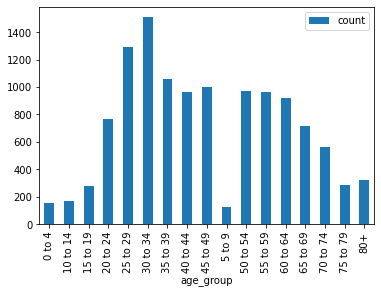

In [ ]:
data2.plot(x ='age_group', y='count', kind = 'bar')
plt.show()

##Which age group has the highest risk of death when affected with covid19?

In [ ]:
df['status'].describe()

count              12091
unique                 5
top       For validation
freq                5790
Name: status, dtype: object

Select age_group, age and status column to do the analysis and put the selected column in a new data frame 

In [ ]:
data3 = df[['age_group','age','status']]
data3

,age_group,age,status
0,35 to 39,38.0,Recovered
1,40 to 44,44.0,Died
2,60 to 64,60.0,Recovered
3,45 to 49,48.0,Recovered
4,60 to 64,62.0,Died
...,...,...,...
12086,35 to 39,35.0,For validation
12087,35 to 39,37.0,Died
12088,60 to 64,62.0,For validation
12089,15 to 19,18.0,Home quarantined


Drop rows in the new data frame that have the Nan values

In [ ]:
data3= data3.dropna()
data3= data3.reset_index(drop=True)
data3

,age_group,age,status
0,35 to 39,38.0,Recovered
1,40 to 44,44.0,Died
2,60 to 64,60.0,Recovered
3,45 to 49,48.0,Recovered
4,60 to 64,62.0,Died
...,...,...,...
12065,35 to 39,35.0,For validation
12066,35 to 39,37.0,Died
12067,60 to 64,62.0,For validation
12068,15 to 19,18.0,Home quarantined


Group the data according to the age group and the patient status

In [ ]:
data3_count = data3.groupby(["age_group"])["status"].value_counts()
data3_count

age_group  status          
0 to 4     For validation      100
           Admitted             22
           Recovered            14
           Home quarantined     11
           Died                  7
                              ... 
80+        Died                108
           For validation       90
           Admitted             72
           Recovered            37
           Home quarantined     14
Name: status, Length: 85, dtype: int64

In [ ]:
 data3_count1= data3.groupby("age_group")["status"].count()
 data3_count1

age_group
0 to 4       154
10 to 14     169
15 to 19     282
20 to 24     767
25 to 29    1289
30 to 34    1510
35 to 39    1061
40 to 44     967
45 to 49    1002
5 to 9       122
50 to 54     973
55 to 59     967
60 to 64     921
65 to 69     713
70 to 74     565
75 to 79     287
80+          321
Name: status, dtype: int64

Use unstack function to separate the unique data from status column into 5 differents new column. The data in the new columns is a value accumulate from each of the age_group column. Then, add 3 more additional columns which are total, Died_percent, and Recovered_percent. The formula has been added into the code for calculating the Died percentange and Recovered percentage for each age group. 

In [ ]:
data3_status = data3.groupby('age_group')['status'].value_counts().unstack().fillna(0)
data3_status.rename(columns = {'Home quarantined':'home_quarantined'}, inplace = True)
data3_status.rename(columns = {'For validation':'for_validation'}, inplace = True)
data3_status['total'] = data3_status.apply(lambda row: row.Admitted + row.Died + row.for_validation + row.home_quarantined + row.Recovered, axis=1)
data3_status['Died_percent'] = data3_status.apply(lambda row: row.Died/ row.total * 100, axis=1)
data3_status['Recovered_percent'] = data3_status.apply(lambda row: row.Recovered/ row.total * 100, axis=1)
data3_status = data3_status.round(2)
data3_status

status,Admitted,Died,for_validation,home_quarantined,Recovered,total,Died_percent,Recovered_percent
age_group,,,,,,,,
0 to 4,22,7,100,11,14,154,4.55,9.09
10 to 14,8,1,142,11,7,169,0.59,4.14
15 to 19,25,4,228,15,10,282,1.42,3.55
20 to 24,97,3,451,90,126,767,0.39,16.43
25 to 29,140,6,718,184,241,1289,0.47,18.70
30 to 34,185,11,745,230,339,1510,0.73,22.45
35 to 39,129,20,563,130,219,1061,1.89,20.64
40 to 44,128,30,506,114,189,967,3.10,19.54
45 to 49,151,38,483,103,227,1002,3.79,22.65


In [ ]:
data3_status.dtypes

status
Admitted               int64
Died                   int64
for_validation         int64
home_quarantined       int64
Recovered              int64
total                  int64
Died_percent         float64
Recovered_percent    float64
dtype: object

To find the maximum number of Die based on age group

In [ ]:
data3_status = data3_status["Died"]
maxDie = data3_status.max()
print(maxDie)


129


Plotting a graph for Died percentage based on age group

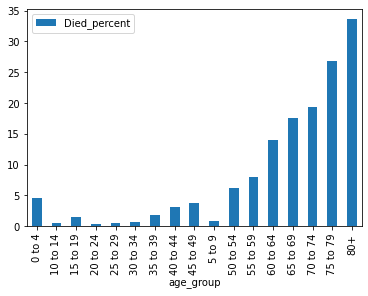

In [ ]:
data3_status.plot.bar(y='Died_percent')

#Which province in the Philippine has led to the increased number of cases in the Philippine?

Select case_id and province column to do the analysis and put it into a new data frame. 
Drop rows that contain Nan values inside the data frame.
Count the number of cases according to the province
Drop column case_id.
Drop duplicates values 

In [ ]:
data5 = df[["case_id", "province"]]
data5 = data5.dropna()
data5 = data5.reset_index(drop=True)
data5['count'] = data5.groupby("province").transform('count')
data5.drop('case_id', inplace=True, axis=1)
data5 = data5.drop_duplicates()
data5

,province,count
0,Negros Oriental,7
2,Bohol,1
3,Metropolitan Manila,6873
4,Rizal,417
12,Bulacan,141
...,...,...
7038,Ifugao,2
8321,Sulu,1
8783,Guimaras,2
9289,Davao Occidental,1


Find province that has the highest case of Covid-19

In [ ]:
promax = data5.max()
promax

province    Zamboanga del Sur
count                    6873
dtype: object

Find province that has the lowest case of Covid-19

In [ ]:
promin = data5.min()
promin

province    Abra
count          1
dtype: object